In [2]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup

In [3]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    random_unitary,
    simulation)

In [4]:
five_orderings = orders.n_alternating_c5_orders(16,n = 2)

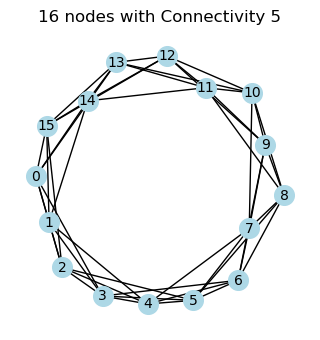

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# The data containing two arrays
data = orders.n_alternating_c5_orders(16,n = 2)
data = orders.n_line_orders(16,n = 4,chunk_sizes = [4,4,4,4])

# Iterate through the data arrays
for array in data:
    # For each group in the array
    for group in array:
        # Create edges between nodes in the same group
        for i in range(len(group)):
            for j in range(i + 1, len(group)):
                G.add_edge(group[i], group[j])

# Plot the graph
plt.figure(1,figsize=(3,3))
pos = nx.spring_layout(G)  # Define the layout for the nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.title("16 nodes with Connectivity 5")
plt.show()


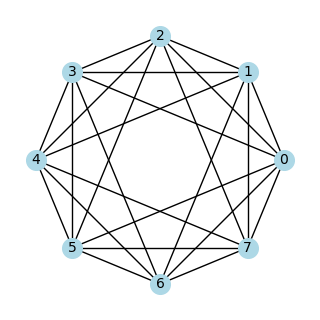

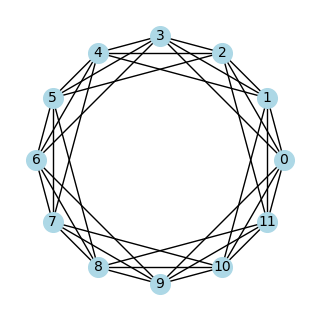

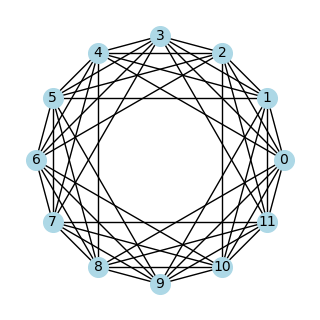

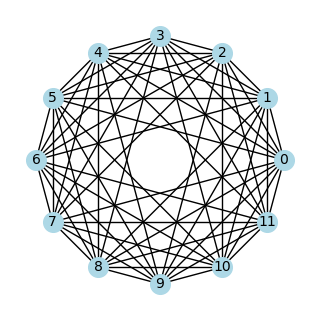

In [6]:
# Cayley digraph of G , (pg 7)
# https://cs.indstate.edu/~mighty52/slides/dobson.pdf

def cay(n,s):
    """
    this is the cayley group of z%n
    s must NOT include the identity (0) and s must be the same as s inverse.
    """
    G = nx.Graph()
    for node in range(n):
        for m in s:
            G.add_edge(node,(node+m)%n)
    return(G)


def cay_d(n,s):
    """
    this is the cayley group of D_2n
    each group element is represented by a tuple, the rotation number and weather or not its been flipped. 
    s must NOT include the identity (0) and s must be the same as s inverse.
    """
    G = nx.Graph()
    for flip_index in [0,1]:
        for node_index in range(n):
            node = (node_index,flip_index)
            for m in s:
                G.add_edge(node,(((node[0]+m[0])%n),(node[1]+m[1])%2))
    return(G)

# g = cay(8,[1,7,2,6,4])
# plt.figure(1,figsize=(3,3))
# pos = nx.circular_layout(g)  # Define the layout for the nodes
# nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
# plt.show()



g = cay(8,[1,2,3])
plt.figure(1,figsize=(3,3))
pos = nx.circular_layout(g) 
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()

g = cay(12,[1,2,3])
plt.figure(1,figsize=(3,3))
pos = nx.circular_layout(g) 
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()


g = cay(12,[1,2,3,4])
plt.figure(1,figsize=(3,3))
pos = nx.circular_layout(g) 
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()


g = cay(12,[1,2,3,4,5])
plt.figure(1,figsize=(3,3))
pos = nx.circular_layout(g) 
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()





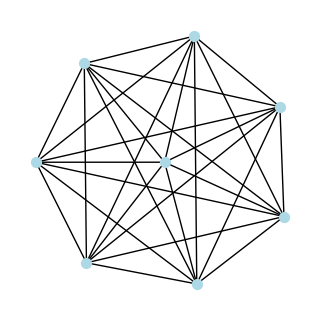

In [90]:
g = cay_d(4,[(0,1),(1,0),(1,1),(2,0),(2,1)])
plt.figure(1,figsize=(3,3))
pos = nx.spring_layout(g) 
nx.draw(g, pos, node_color='lightblue', node_size=50, font_size=10)
plt.show()

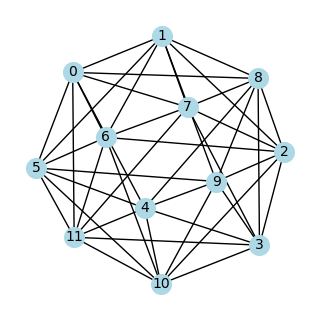

In [154]:

g = cay(12,[1,11,5,7,4,8,6])
plt.figure(1,figsize=(3,3))
pos = nx.spring_layout(g)  # Define the layout for the nodes

nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()




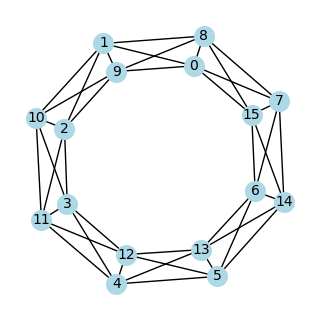

In [9]:
g = cay(16,[1,9,8,7,15])
plt.figure(1,figsize=(3,3))
pos = nx.spring_layout(g)  # Define the layout for the nodes

nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()

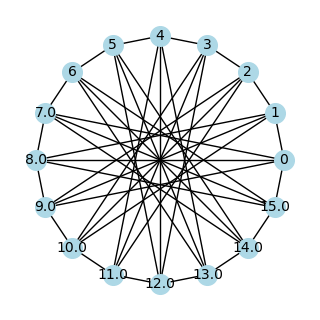

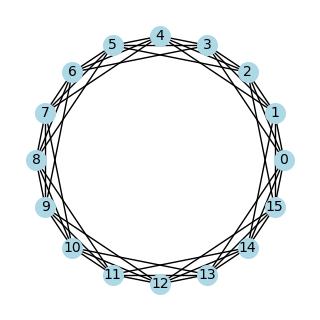

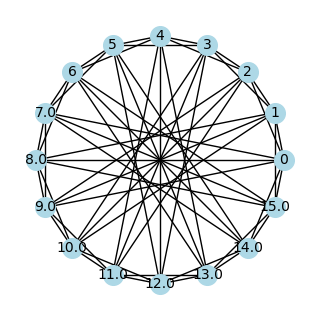

In [89]:
n = 16

g = cay(n,[1,n/2,n/2-1])
plt.figure(1,figsize=(3,3))
r = 1.0
t = 2*np.pi/n
pos = {n:np.array([r*np.cos(t*n),r*np.sin(t*n)]) for n in g}
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()

g = cay(n,[1,2,3])
plt.figure(1,figsize=(3,3))
r = 1.0
t = 2*np.pi/n
pos = {n:np.array([r*np.cos(t*n),r*np.sin(t*n)]) for n in g}
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()

g = cay(n,[1,n/2,n/2-1,2])
plt.figure(1,figsize=(3,3))
r = 1.0
t = 2*np.pi/n
pos = {n:np.array([r*np.cos(t*n),r*np.sin(t*n)]) for n in g}
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()



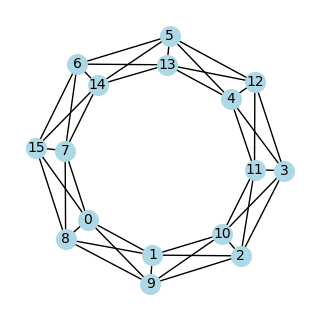

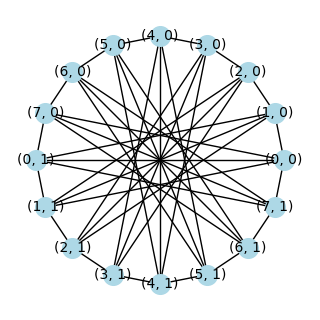

In [82]:
g = cay(16,[1,15,8,7,9])
plt.figure(1,figsize=(3,3))
r = 1.0
t = 2*np.pi/16.0
pos = {n:np.array([r*np.cos(t*n),r*np.sin(t*n)]) for n in g}
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()

g = cay_d(8,[(0,1),(1,0),(1,1)])
plt.figure(1,figsize=(3,3))
pos = {n:np.array([r*np.cos(t*(8*n[1]+n[0])),r*np.sin(t*(8*n[1]+n[0]))]) for n in g}
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()

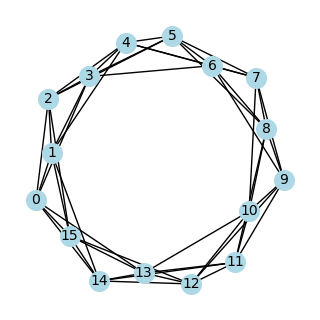

In [ ]:
g = cay(16,[1,15,2,14,3,13])
plt.figure(1,figsize=(3,3))
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()

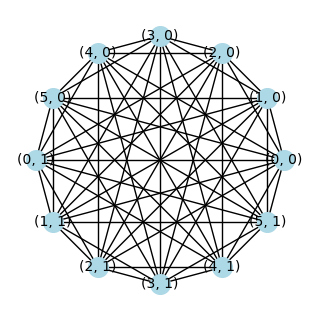

In [8]:
g = cay_d(6,[(0,1),(1,0),(1,1),(2,0),(2,1)])
plt.figure(1,figsize=(3,3))
t = 2*np.pi/12.0
r = 1.0
pos = {n:np.array([r*np.cos(t*(6*n[1]+n[0])),r*np.sin(t*(6*n[1]+n[0]))]) for n in g}
nx.draw(g, pos, with_labels=True, node_color='lightblue', node_size=200, font_size=10)
plt.show()